In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
merged_data = pd.read_csv(r"C:\Documents\Python data set\merged.csv")

In [4]:
# checking the data
merged_data.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,10,24,2,1900.0,1700,2111.0,1910,AA,2097,...,7,17,0,NaN,0,69,0,1,0,51
1,2006,11,19,7,1352.0,1351,1649.0,1726,UA,177,...,6,12,0,NaN,0,0,0,0,0,0
2,2006,4,28,5,1632.0,1635,1730.0,1743,OH,5260,...,5,10,0,NaN,0,0,0,0,0,0
3,2006,5,4,4,2006.0,1955,2115.0,2105,WN,1454,...,3,19,0,NaN,0,0,0,0,0,0
4,2006,12,21,4,744.0,730,901.0,826,AS,143,...,2,36,0,NaN,0,0,14,21,0,0
5,2006,12,12,2,905.0,905,1031.0,1047,OH,5319,...,9,10,0,NaN,0,0,0,0,0,0
6,2007,2,3,6,1815.0,1810,2037.0,2023,XE,3068,...,5,13,0,NaN,0,0,0,0,0,0
7,2007,1,9,2,1856.0,1900,2050.0,2059,9E,4793,...,15,10,0,NaN,0,0,0,0,0,0
8,2006,11,30,4,1212.0,1210,1217.0,1215,WN,1887,...,4,13,0,NaN,0,0,0,0,0,0
9,2006,6,24,6,1152.0,1046,1306.0,1159,OO,6207,...,6,10,0,NaN,0,0,0,67,0,0


In [5]:
merged_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Finding the best days of the week to minimise delays

In [6]:
# Dayofweek column grouped by ArrDelay and DepDelay with averages
avgdelay_weekdays = merged_data.groupby("DayOfWeek")["ArrDelay","DepDelay"].mean().reset_index()

C:\Users\Mohamed Shiham\AppData\Local\Temp\ipykernel_6468\220576538.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgdelay_weekdays = merged_data.groupby("DayOfWeek")["ArrDelay","DepDelay"].mean().reset_index()


In [7]:
avgdelay_weekdays

,DayOfWeek,ArrDelay,DepDelay
0,1,9.596537,11.031422
1,2,7.317402,8.641886
2,3,9.184627,9.962223
3,4,12.216827,12.424417
4,5,12.701768,13.313415
5,6,5.643786,8.728543
6,7,9.206175,11.099296


In [8]:
# Set index on the weekdays column on the table
avgdelay_weekdays.set_index("DayOfWeek")

,ArrDelay,DepDelay
DayOfWeek,,
1,9.596537,11.031422
2,7.317402,8.641886
3,9.184627,9.962223
4,12.216827,12.424417
5,12.701768,13.313415
6,5.643786,8.728543
7,9.206175,11.099296


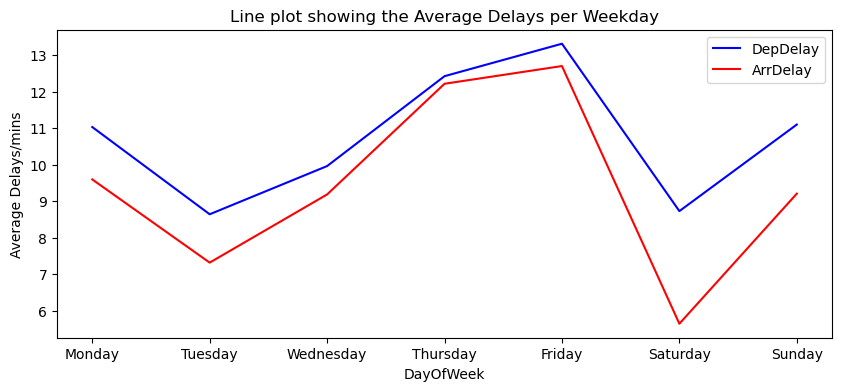

In [9]:
# plotting lineplot for DepDelay and ArrDelay
fig, ax=plt.subplots(figsize=(10,4))
ax.plot(avgdelay_weekdays['DayOfWeek'],avgdelay_weekdays['DepDelay'],color='blue',label='DepDelay')
ax.plot(avgdelay_weekdays['DayOfWeek'],avgdelay_weekdays['ArrDelay'],color='red',label='ArrDelay')
plt.xticks(avgdelay_weekdays['DayOfWeek'],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel('Average Delays/mins')
ax.set_xlabel('DayOfWeek')
ax.title.set_text('Line plot showing the Average Delays per Weekday')
ax.legend()
plt.show()

Overall saturday is the bestday of week to minimise delays

# Finding the best time of day to minimise the delay

In [10]:
# combining both delays as total delays
merged_data["Total_delay"] = "NA"
merged_data["Total_delay"] = merged_data.ArrDelay + merged_data.DepDelay

In [11]:
#CRS Time is split to 6 time intervals
Total_delay_time=[merged_data[(merged_data.CRSDepTime>=0000.0) & (merged_data.CRSDepTime<0400.0)].Total_delay,
                 merged_data[(merged_data.CRSDepTime>=0400.0) & (merged_data.CRSDepTime<0800.0)].Total_delay,
                 merged_data[(merged_data.CRSDepTime>=0800.0) & (merged_data.CRSDepTime<1200.0)].Total_delay,
                 merged_data[(merged_data.CRSDepTime>=1200.0) & (merged_data.CRSDepTime<1600.0)].Total_delay, 
                 merged_data[(merged_data.CRSDepTime>=1600.0) & (merged_data.CRSDepTime<2000.0)].Total_delay,
                 merged_data[(merged_data.CRSDepTime>=2000.0) & (merged_data.CRSDepTime<2400.0)].Total_delay]

In [12]:
# Define the time intervals
time_intervals = ('00:00-03:59', '04:00-07:59', '08:00-11:59', '12:00-15:59', '16:00-19:59', '20:00-23:59')

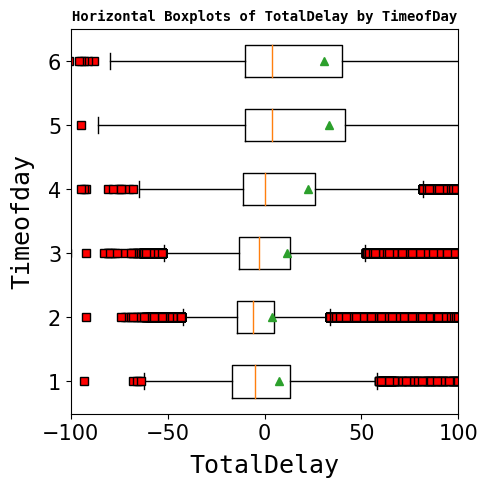

In [35]:
fig, ax = plt.subplots(figsize=(5,5))

ax.boxplot(Total_delay_time, vert=False, 
           flierprops=dict(markerfacecolor='r', marker='s'),
           showmeans=True)

ax.set_ylabel('Timeofday',
                 color='black',
                 family = 'monospace',
                 size = 18,
                 labelpad=10)
ax.set_xlabel('TotalDelay',
                 color='black',
                 family = 'monospace',
                 size = 18,
                 labelpad=7)
ax.set_title("Horizontal Boxplots of TotalDelay by TimeofDay",
                color='black',
                family = 'monospace',
                size = 10,
                weight = 'bold')
ax.tick_params(axis='x', labelcolor='black', labelsize=15)
ax.tick_params(axis='y', labelcolor='black', labelsize=15)
ax.set_xlim([-100,100]) # X axis limit was limited to make the plot more clearer
plt.show()